# World Energy Consumption

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('/content/World Energy Consumption.csv')

In [17]:
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [18]:
# 1. Data Head:
print(data.head())

         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0      

In [19]:
# 2. Check for Missing Values:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 country                      0
year                         0
iso_code                  2023
population                1520
gdp                       4281
                          ... 
wind_elec_per_capita      6169
wind_electricity          5719
wind_energy_per_capita    7526
wind_share_elec           5966
wind_share_energy         7252
Length: 129, dtype: int64


In [20]:
# 3. Check for Duplicates:
print("\nDuplicate Rows:", data.duplicated().sum())


Duplicate Rows: 0


In [21]:
# 4. Check Data Types:
print("\nData Types:\n", data.dtypes)


Data Types:
 country                    object
year                        int64
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 129, dtype: object


In [22]:
# 5. Descriptive Statistics:
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
               year    population           gdp  biofuel_cons_change_pct  \
count  8658.000000  7.138000e+03  4.377000e+03               628.000000   
mean   1973.112266  8.979055e+07  2.351342e+11                53.494311   
std      35.357435  3.656876e+08  9.492277e+11               319.213199   
min    1900.000000  2.245000e+03  1.642060e+08              -100.000000   
25%    1944.000000  8.762128e+05  9.887751e+09                -0.699750   
50%    1983.000000  5.801371e+06  3.270831e+10                 8.899000   
75%    2003.000000  1.585908e+07  1.262204e+11                31.571500   
max    2022.000000  4.721383e+09  1.815162e+13              5659.328000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count               971.000000               788.000000          1001.000000   
mean                  1.603770               153.299201            19.623024   
std                   5.555009               245.193486   

In [23]:
# Remove columns that are too empty (>50% missing)
threshold = 0.5 * len(data)
df_clean = data.dropna(axis=1, thresh=threshold)

In [24]:
# Drop rows missing essential identifiers
df_clean = df_clean.dropna(subset=['country', 'year'])

In [25]:
# If 'iso_code' exists, remove aggregate regions
if 'iso_code' in df_clean.columns:
    df_clean = df_clean[df_clean['iso_code'].notna()]

In [26]:
# Fill numeric NaN values with column medians
num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

In [27]:
print("\n After cleaning:")


 After cleaning:


In [28]:
print("Shape:", df_clean.shape)

Shape: (6635, 17)


In [29]:
print("Remaining columns:", df_clean.columns.tolist()[:15], "...")

Remaining columns: ['country', 'year', 'iso_code', 'population', 'gdp', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'energy_cons_change_pct', 'energy_cons_change_twh', 'gas_prod_change_twh', 'gas_prod_per_capita', 'gas_production', 'oil_prod_change_twh', 'oil_prod_per_capita'] ...


Exploratory Data Analysis (EDA)

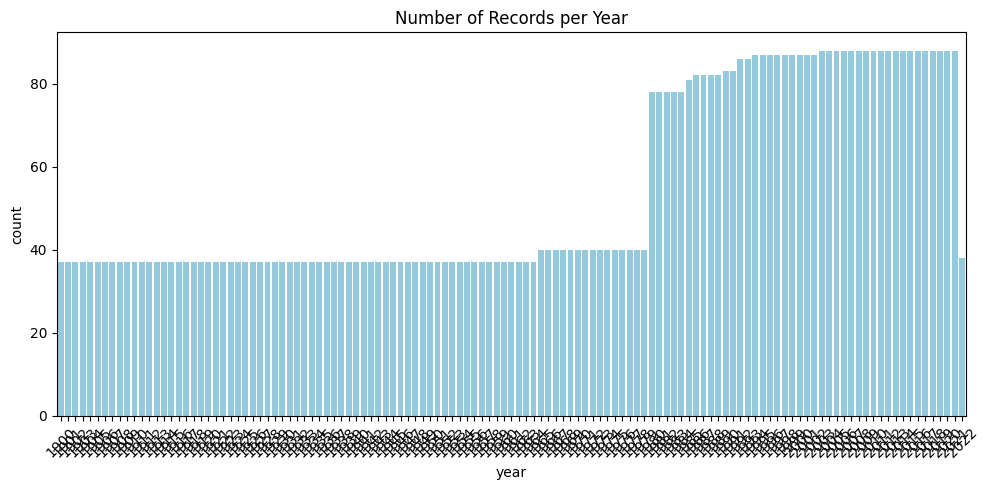

In [30]:
#Records per year
plt.figure(figsize=(10,5))
sns.countplot(data=df_clean, x='year', color='skyblue')
plt.title('Number of Records per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

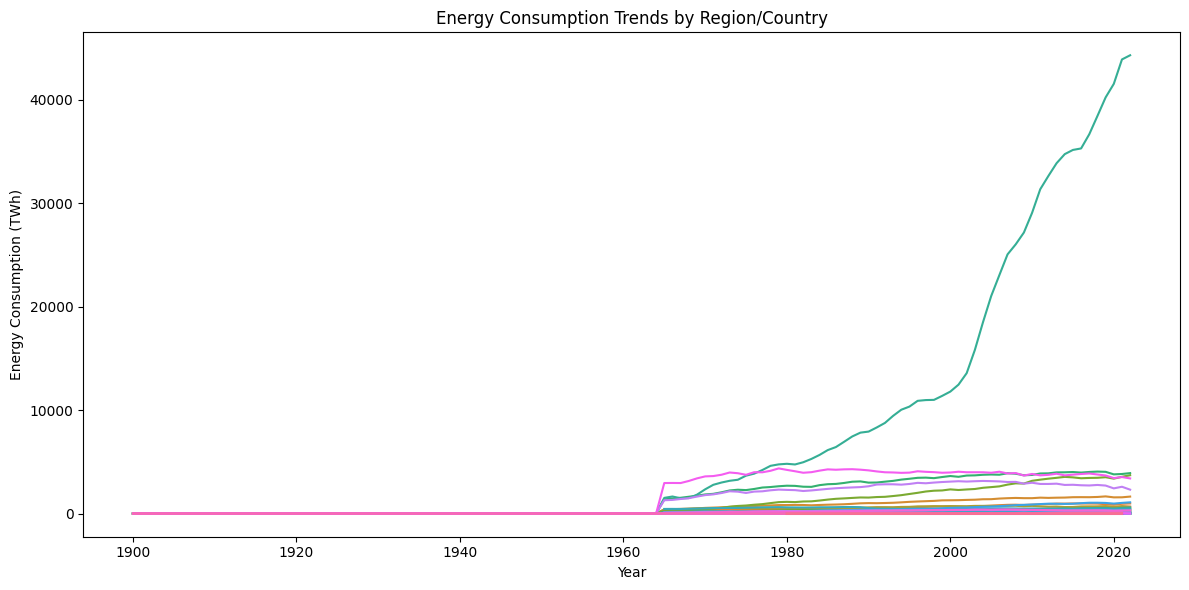

In [31]:
# --- Energy Consumption by Region Over Time ---
if 'primary_energy_consumption' in df_clean.columns:
    region_trend = (
        df_clean.groupby(['country', 'year'])['primary_energy_consumption']
        .sum().reset_index()
    )

    plt.figure(figsize=(12,6))
    sns.lineplot(data=region_trend, x='year', y='primary_energy_consumption', hue='country', legend=False)
    plt.title('Energy Consumption Trends by Region/Country')
    plt.ylabel('Energy Consumption (TWh)')
    plt.xlabel('Year')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-2998587560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_energy.values, y=country_energy.index, palette='viridis')


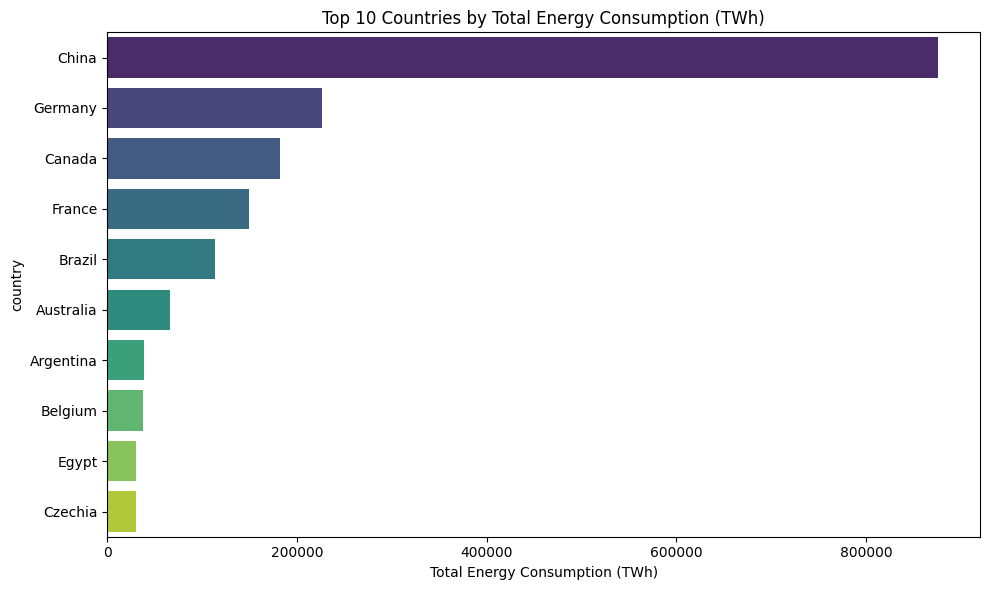

In [32]:
#  Top 10 countries by total energy consumption
if 'primary_energy_consumption' in df_clean.columns:
    country_energy = (df_clean.groupby('country')['primary_energy_consumption']
                      .sum().sort_values(ascending=False).head(10))
    plt.figure(figsize=(10,6))
    sns.barplot(x=country_energy.values, y=country_energy.index, palette='viridis')
    plt.title('Top 10 Countries by Total Energy Consumption (TWh)')
    plt.xlabel('Total Energy Consumption (TWh)')
    plt.tight_layout()
    plt.show()

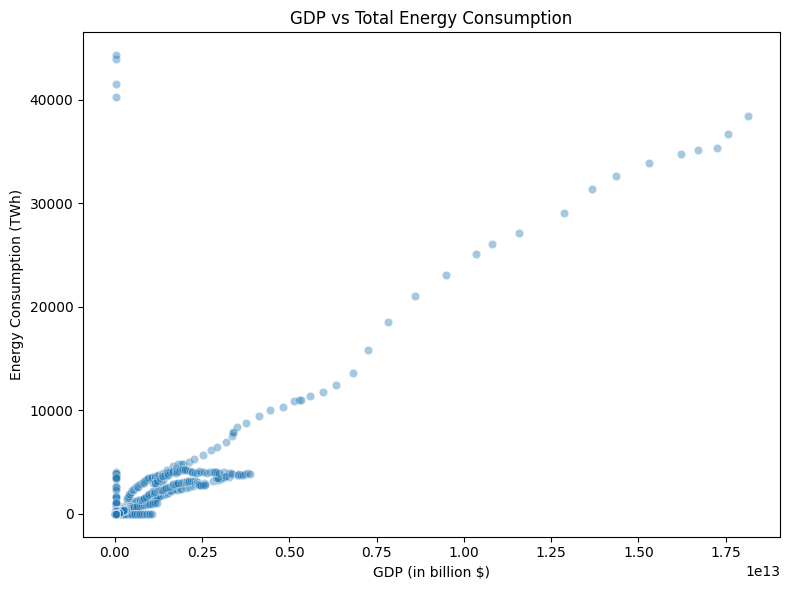

💡 Correlation between GDP and Energy Consumption: 0.82


In [33]:
# --- GDP vs Energy Consumption ---
if all(c in df_clean.columns for c in ['gdp', 'primary_energy_consumption']):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_clean, x='gdp', y='primary_energy_consumption', alpha=0.4)
    plt.title('GDP vs Total Energy Consumption')
    plt.xlabel('GDP (in billion $)')
    plt.ylabel('Energy Consumption (TWh)')
    plt.tight_layout()
    plt.show()

    corr = df_clean[['gdp', 'primary_energy_consumption']].corr().iloc[0,1]
    print(f"💡 Correlation between GDP and Energy Consumption: {corr:.2f}")


In [34]:
# 5. Insights Summary
print("\n Insights:")
print("- Dataset contains", df_clean['country'].nunique(), "countries.")
print("- Years covered:", df_clean['year'].min(), "to", df_clean['year'].max())
if 'primary_energy_consumption' in df_clean.columns:
    print("- Average total energy consumption per country:",
          round(df_clean['primary_energy_consumption'].mean(), 2), "TWh.")
if 'renewables_share_energy' in df_clean.columns:
    print("- Average share of renewables in energy mix:",
          round(df_clean['renewables_share_energy'].mean(), 2), "%.")


 Insights:
- Dataset contains 88 countries.
- Years covered: 1900 to 2022
- Average total energy consumption per country: 304.64 TWh.


# Task
Train a machine learning model on the dataset, evaluate its performance, and report the accuracy and other relevant metrics.

## Feature selection

### Subtask:
Identify and select relevant features for model training.


**Reasoning**:
Select relevant features and the target variable for the model training based on the cleaned dataframe.



**Reasoning**:
The previous command failed because the dataframe `df_clean` was not available in the current session. Re-execute the cleaning steps to create `df_clean` and then select the features and target variable.



**Reasoning**:
The previous command failed because the original dataframe `data` was not available. Re-load the data, perform the cleaning steps, and then select the features and the target variable.



In [37]:
data = pd.read_csv('/content/World Energy Consumption.csv')

# Remove columns that are too empty (>50% missing)
threshold = 0.5 * len(data)
df_clean = data.dropna(axis=1, thresh=threshold)

# Drop rows missing essential identifiers
df_clean = df_clean.dropna(subset=['country', 'year'])

# If 'iso_code' exists, remove aggregate regions
if 'iso_code' in df_clean.columns:
    df_clean = df_clean[df_clean['iso_code'].notna()]

# Fill numeric NaN values with column medians
num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Identify potential features (excluding the target and obviously non-predictive columns like identifiers)
potential_features = [col for col in df_clean.columns if col not in ['country', 'year', 'iso_code', 'primary_energy_consumption']]

# For this subtask, we will select a subset of energy-related features.
# In a real scenario, feature selection would involve more domain knowledge and analysis.
features = [
    'population',
    'gdp',
    'coal_production',
    'gas_production',
    'oil_production',
    'energy_cons_change_pct',
    'energy_cons_change_twh'
]

# Define the target variable
target = 'primary_energy_consumption'

# Ensure the target is not in the features list
features = [f for f in features if f != target]

print("Selected Features:", features)
print("Target Variable:", target)

Selected Features: ['population', 'gdp', 'coal_production', 'gas_production', 'oil_production', 'energy_cons_change_pct', 'energy_cons_change_twh']
Target Variable: primary_energy_consumption


**Reasoning**:
The previous command failed because the `pandas` library was not imported. Import the necessary libraries, then reload the data, perform the cleaning steps, and select the features and the target variable.



In [38]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/World Energy Consumption.csv')

# Remove columns that are too empty (>50% missing)
threshold = 0.5 * len(data)
df_clean = data.dropna(axis=1, thresh=threshold)

# Drop rows missing essential identifiers
df_clean = df_clean.dropna(subset=['country', 'year'])

# If 'iso_code' exists, remove aggregate regions
if 'iso_code' in df_clean.columns:
    df_clean = df_clean[df_clean['iso_code'].notna()]

# Fill numeric NaN values with column medians
num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Identify potential features (excluding the target and obviously non-predictive columns like identifiers)
potential_features = [col for col in df_clean.columns if col not in ['country', 'year', 'iso_code', 'primary_energy_consumption']]

# For this subtask, we will select a subset of energy-related features.
# In a real scenario, feature selection would involve more domain knowledge and analysis.
features = [
    'population',
    'gdp',
    'coal_production',
    'gas_production',
    'oil_production',
    'energy_cons_change_pct',
    'energy_cons_change_twh'
]

# Define the target variable
target = 'primary_energy_consumption'

# Ensure the target is not in the features list
features = [f for f in features if f != target]

print("Selected Features:", features)
print("Target Variable:", target)

Selected Features: ['population', 'gdp', 'coal_production', 'gas_production', 'oil_production', 'energy_cons_change_pct', 'energy_cons_change_twh']
Target Variable: primary_energy_consumption


In [39]:
# Remove columns that are too empty (>50% missing)
threshold = 0.5 * len(data)
df_clean = data.dropna(axis=1, thresh=threshold)

# Drop rows missing essential identifiers
df_clean = df_clean.dropna(subset=['country', 'year'])

# If 'iso_code' exists, remove aggregate regions
if 'iso_code' in df_clean.columns:
    df_clean = df_clean[df_clean['iso_code'].notna()]

# Fill numeric NaN values with column medians
num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Identify potential features (excluding the target and obviously non-predictive columns like identifiers)
potential_features = [col for col in df_clean.columns if col not in ['country', 'year', 'iso_code', 'primary_energy_consumption']]

# For this subtask, we will select a subset of energy-related features.
# In a real scenario, feature selection would involve more domain knowledge and analysis.
features = [
    'population',
    'gdp',
    'coal_production',
    'gas_production',
    'oil_production',
    'energy_cons_change_pct',
    'energy_cons_change_twh'
]

# Define the target variable
target = 'primary_energy_consumption'

# Ensure the target is not in the features list
features = [f for f in features if f != target]

print("Selected Features:", features)
print("Target Variable:", target)

Selected Features: ['population', 'gdp', 'coal_production', 'gas_production', 'oil_production', 'energy_cons_change_pct', 'energy_cons_change_twh']
Target Variable: primary_energy_consumption


**Reasoning**:
The dataframe `data` is not available. The previous notebook state shows that the data was loaded and cleaning steps were performed. I need to re-run the data loading and cleaning steps before proceeding with feature selection.



In [40]:
import pandas as pd
import numpy as np

# Reload the data as the previous attempts failed to access it.
data = pd.read_csv('/content/World Energy Consumption.csv')

# Clean the data again as the previous attempts failed.
# Remove columns that are too empty (>50% missing)
threshold = 0.5 * len(data)
df_clean = data.dropna(axis=1, thresh=threshold)

# Drop rows missing essential identifiers
df_clean = df_clean.dropna(subset=['country', 'year'])

# If 'iso_code' exists, remove aggregate regions
if 'iso_code' in df_clean.columns:
    df_clean = df_clean[df_clean['iso_code'].notna()]

# Fill numeric NaN values with column medians
num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Identify potential features (excluding the target and obviously non-predictive columns like identifiers)
potential_features = [col for col in df_clean.columns if col not in ['country', 'year', 'iso_code', 'primary_energy_consumption']]

# For this subtask, we will select a subset of energy-related features.
# In a real scenario, feature selection would involve more domain knowledge and analysis.
features = [
    'population',
    'gdp',
    'coal_production',
    'gas_production',
    'oil_production',
    'energy_cons_change_pct',
    'energy_cons_change_twh'
]

# Define the target variable
target = 'primary_energy_consumption'

# Ensure the target is not in the features list
features = [f for f in features if f != target]

print("Selected Features:", features)
print("Target Variable:", target)

Selected Features: ['population', 'gdp', 'coal_production', 'gas_production', 'oil_production', 'energy_cons_change_pct', 'energy_cons_change_twh']
Target Variable: primary_energy_consumption


In [41]:
from sklearn.model_selection import train_test_split

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5308, 7)
Shape of X_test: (1327, 7)
Shape of y_train: (5308,)
Shape of y_test: (1327,)


**Reasoning**:
The previous command failed because the dataframe `df_clean` was not defined in the current session. Need to reload the data and perform the cleaning steps again to define `df_clean` before splitting the data.



In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Reload the data
data = pd.read_csv('/content/World Energy Consumption.csv')

# Clean the data
threshold = 0.5 * len(data)
df_clean = data.dropna(axis=1, thresh=threshold)
df_clean = df_clean.dropna(subset=['country', 'year'])

if 'iso_code' in df_clean.columns:
    df_clean = df_clean[df_clean['iso_code'].notna()]

num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Define features and target
features = [
    'population',
    'gdp',
    'coal_production',
    'gas_production',
    'oil_production',
    'energy_cons_change_pct',
    'energy_cons_change_twh'
]
target = 'primary_energy_consumption'

features = [f for f in features if f != target]

# Split the data
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5308, 7)
Shape of X_test: (1327, 7)
Shape of y_train: (5308,)
Shape of y_test: (1327,)


In [43]:
# Reload the data
data = pd.read_csv('/content/World Energy Consumption.csv')

# Clean the data
threshold = 0.5 * len(data)
df_clean = data.dropna(axis=1, thresh=threshold)
df_clean = df_clean.dropna(subset=['country', 'year'])

if 'iso_code' in df_clean.columns:
    df_clean = df_clean[df_clean['iso_code'].notna()]

num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Define features and target
features = [
    'population',
    'gdp',
    'coal_production',
    'gas_production',
    'oil_production',
    'energy_cons_change_pct',
    'energy_cons_change_twh'
]
target = 'primary_energy_consumption'

features = [f for f in features if f != target and f in df_clean.columns]

# Choose a machine learning model
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)

print("Selected Model:")
print(model)

Selected Model:
GradientBoostingRegressor(random_state=42)


## Model training

### Subtask:
Train the selected model using the training data.


**Reasoning**:
Train the GradientBoostingRegressor model using the training data X_train and y_train.



In [44]:
# Reload the data
data = pd.read_csv('/content/World Energy Consumption.csv')

# Clean the data
threshold = 0.5 * len(data)
df_clean = data.dropna(axis=1, thresh=threshold)
df_clean = df_clean.dropna(subset=['country', 'year'])

if 'iso_code' in df_clean.columns:
    df_clean = df_clean[df_clean['iso_code'].notna()]

num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Define features and target
features = [
    'population',
    'gdp',
    'coal_production',
    'gas_production',
    'oil_production',
    'energy_cons_change_pct',
    'energy_cons_change_twh'
]
target = 'primary_energy_consumption'

features = [f for f in features if f != target and f in df_clean.columns]

# Split the data
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reload and clean the data
data = pd.read_csv('/content/World Energy Consumption.csv')
threshold = 0.5 * len(data)
df_clean = data.dropna(axis=1, thresh=threshold)
df_clean = df_clean.dropna(subset=['country', 'year'])

if 'iso_code' in df_clean.columns:
    df_clean = df_clean[df_clean['iso_code'].notna()]

num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Define features and target
features = [
    'population',
    'gdp',
    'coal_production',
    'gas_production',
    'oil_production',
    'energy_cons_change_pct',
    'energy_cons_change_twh'
]
target = 'primary_energy_consumption'
features = [f for f in features if f != target and f in df_clean.columns]

# Split the data
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Model training complete.
Mean Absolute Error (MAE): 48.41
Mean Squared Error (MSE): 29682.77
R-squared (R2) Score: 0.99
